In [1]:
import sqlite3
import pandas as pd
import numpy as np


In [2]:
# Crear conexión a base de datos
conn = sqlite3.connect("sales.db")
cursor = conn.cursor()

# Crear tabla productos
cursor.execute("""
CREATE TABLE IF NOT EXISTS productos (
    producto_id INTEGER PRIMARY KEY,
    nombre TEXT,
    categoria TEXT,
    precio REAL
)
""")

# Crear tabla clientes
cursor.execute("""
CREATE TABLE IF NOT EXISTS clientes (
    cliente_id INTEGER PRIMARY KEY,
    nombre TEXT,
    ciudad TEXT
)
""")

# Crear tabla ventas
cursor.execute("""
CREATE TABLE IF NOT EXISTS ventas (
    venta_id INTEGER PRIMARY KEY,
    producto_id INTEGER,
    cliente_id INTEGER,
    fecha TEXT,
    cantidad INTEGER,
    FOREIGN KEY(producto_id) REFERENCES productos(producto_id),
    FOREIGN KEY(cliente_id) REFERENCES clientes(cliente_id)
)
""")

conn.commit()
conn


In [3]:
# Insertar productos
productos = [
    (1, "Laptop", "Tecnología", 15000),
    (2, "Mouse", "Tecnología", 300),
    (3, "Teclado", "Tecnología", 700),
    (4, "Monitor", "Tecnología", 4500),
    (5, "Silla", "Oficina", 3500)
]

cursor.executemany("INSERT OR REPLACE INTO productos VALUES (?, ?, ?, ?)", productos)

# Insertar clientes
clientes = [
    (1, "Juan", "Monterrey"),
    (2, "Ana", "Guadalajara"),
    (3, "Luis", "CDMX"),
    (4, "Maria", "Querétaro")
]

cursor.executemany("INSERT OR REPLACE INTO clientes VALUES (?, ?, ?)", clientes)

# Insertar ventas aleatorias
np.random.seed(1)
ventas = []

for i in range(1, 51):
    venta = (
        i,
        np.random.randint(1, 6),
        np.random.randint(1, 5),
        f"2025-01-{np.random.randint(1, 28)}",
        np.random.randint(1, 5)
    )
    ventas.append(venta)

cursor.executemany("INSERT OR REPLACE INTO ventas VALUES (?, ?, ?, ?, ?)", ventas)

conn.commit()


In [4]:
query = "SELECT * FROM ventas LIMIT 10"
df_ventas = pd.read_sql_query(query, conn)
df_ventas


,venta_id,producto_id,cliente_id,fecha,cantidad
0,1,4,1,2025-01-9,4
1,2,2,4,2025-01-6,4
2,3,1,1,2025-01-2,1
3,4,5,3,2025-01-26,3
4,5,5,3,2025-01-6,3
5,6,5,4,2025-01-11,1
6,7,3,1,2025-01-24,4
7,8,2,2,2025-01-24,3
8,9,1,3,2025-01-14,2
9,10,2,4,2025-01-23,2


In [5]:
query = """
SELECT
    p.nombre,
    SUM(v.cantidad) AS total_vendido
FROM ventas v
JOIN productos p ON v.producto_id = p.producto_id
GROUP BY p.nombre
ORDER BY total_vendido DESC
"""
df_productos = pd.read_sql_query(query, conn)
df_productos


,nombre,total_vendido
0,Silla,38
1,Laptop,27
2,Teclado,26
3,Mouse,26
4,Monitor,7


In [6]:
query = """
SELECT
    p.nombre,
    SUM(v.cantidad * p.precio) AS ingresos
FROM ventas v
JOIN productos p ON v.producto_id = p.producto_id
GROUP BY p.nombre
ORDER BY ingresos DESC
"""
df_ingresos = pd.read_sql_query(query, conn)
df_ingresos


,nombre,ingresos
0,Laptop,405000.0
1,Silla,133000.0
2,Monitor,31500.0
3,Teclado,18200.0
4,Mouse,7800.0


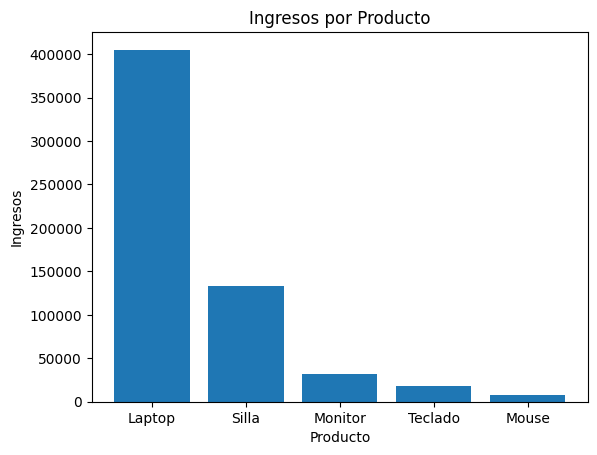

In [7]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_ingresos["nombre"], df_ingresos["ingresos"])
plt.title("Ingresos por Producto")
plt.xlabel("Producto")
plt.ylabel("Ingresos")
plt.show()


This analysis identified top-selling products and revenue contribution using SQL queries and Python visualization. The results highlight product performance differences and support data-driven decisions for sales optimization and inventory planning.